In [1]:
# coding: utf-8

import xarray as xr
import numpy as np
from glob import glob
import sys
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pickle
import calendar
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.colors as cls
import matplotlib as mpl
import copy
import pandas as pd

In [2]:
# Opening a dataset just to get the lat/lon of the grid
aux1 = xr.open_dataset('/chinook/marinier/CONUS_2D/CTRL/2000/wrf2d_d01_CTRL_T2_200010-200012.nc', engine='netcdf4') 
# Land Sea Mask
#/chinook/marinier/CONUS_2D/wrfout_invariants.nc
lsmask = xr.open_dataset('/chinook/marinier/CONUS_2D/wrfout_invariants.nc', engine='netcdf4')

In [3]:
fo = '/chinook/cruman/Data/Near0Events'
# Get the average number of hours near 0
d_array = np.zeros((14,12,1015,1359))
d_array_nopr = np.zeros((14,12,1015,1359))
d_array_pr = np.zeros((14,12,1015,1359))
# Year, Month, Lat, Lon
#for m in range(1,13):
#    l.append([])
t = 0
for i,y in enumerate(range(2000,2014)):
    print(f"Ano {i}")
    for m in range(1,13):
        if y == 2000 and m < 10:
            continue
        if y == 2013 and m > 9:
            continue
        #print(f"Mes: {m}, Ano: {y}")
        aux = pickle.load( open(f'{fo}/t2m_pr1_{y}_{m:02d}.p', 'rb'))
        aux2 = pickle.load( open(f'{fo}/t2m_{y}_{m:02d}.p', 'rb'))
        aux3 = pickle.load( open(f'{fo}/t2m_pr02_CTRL_{y}_{m:02d}.p', 'rb'))
        #print(f'{fo}/t2m_{y}_{m:02d}.p')
        d_array[i,m-1] += aux
        d_array_nopr[i,m-1] += aux2
        d_array_pr[i,m-1] += aux3
        t+= 1
        #print(i, m-1)
        #d_array[m-1].append(aux)
    
print(f"Total # of months: {t}")        

Ano 0
Ano 1
Ano 2
Ano 3
Ano 4
Ano 5
Ano 6
Ano 7
Ano 8
Ano 9
Ano 10
Ano 11
Ano 12
Ano 13
Total # of months: 156


In [4]:
fo = '/chinook/cruman/Data/Near0Events'
# Get the average number of hours near 0
d_array_pgw = np.zeros((14,12,1015,1359))
d_array_nopr_pgw = np.zeros((14,12,1015,1359))
d_array_pr_pgw = np.zeros((14,12,1015,1359))
# Year, Month, Lat, Lon
#for m in range(1,13):
#    l.append([])
t = 0
for i,y in enumerate(range(2000,2014)):
    print(f"Ano {i}")
    for m in range(1,13):
        if y == 2000 and m < 10:
            continue
        if y == 2013 and m > 9:
            continue
        #print(f"Mes: {m}, Ano: {y}")
        #aux = pickle.load( open(f'{fo}/t2m_PGW_pr1_{y}_{m:02d}.p', 'rb'))
        aux2 = pickle.load( open(f'{fo}/t2m_PGW_{y}_{m:02d}.p', 'rb'))
        aux3 = pickle.load( open(f'{fo}/t2m_pr02_PGW_{y}_{m:02d}.p', 'rb'))
        #print(f'{fo}/t2m_{y}_{m:02d}.p')
        #d_array_pgw[i,m-1] += aux
        d_array_nopr_pgw[i,m-1] += aux2
        d_array_pr_pgw[i,m-1] += aux3
        t+= 1
        #print(i, m-1)
        #d_array[m-1].append(aux)
    
print(f"Total # of months: {t}")        

Ano 0
Ano 1
Ano 2
Ano 3
Ano 4
Ano 5
Ano 6
Ano 7
Ano 8
Ano 9
Ano 10
Ano 11
Ano 12
Ano 13
Total # of months: 156


In [5]:
def removeCorners(aux, n=25):
    aux[:n,:] = np.nan
    aux[:,:n] = np.nan
    aux[-n:,:] = np.nan
    aux[:,-n:] = np.nan
    
    return aux

In [6]:
# Month 12 yearly total
total_month_nopr = np.sum(d_array_nopr, axis=0)
total_month_nopr_pgw = np.sum(d_array_nopr_pgw, axis=0)
total_month_pr = np.sum(d_array_pr, axis=0)
total_month_pr_pgw = np.sum(d_array_pr_pgw, axis=0)

# Annual yearly average total of hours
total_nopr = np.sum(total_month_nopr, axis=0)
total_nopr_pgw = np.sum(total_month_nopr_pgw, axis=0)
total_pr = np.sum(total_month_pr, axis=0)
total_pr_pgw = np.sum(total_month_pr_pgw, axis=0)


In [7]:
total_month_nopr = removeCorners(total_month_nopr)
total_month_nopr_pgw = removeCorners(total_month_nopr_pgw)

total_nopr = removeCorners(total_nopr)
total_nopr_pgw = removeCorners(total_nopr_pgw)
total_pr = removeCorners(total_pr)
total_pr_pgw = removeCorners(total_pr_pgw)

In [8]:
total_perc = total_pr*100/total_nopr
total_perc_pgw = total_pr_pgw*100/total_nopr_pgw

<ipython-input-8-96fc70ad63e1>:1: RuntimeWarning: invalid value encountered in true_divide
  total_perc = total_pr*100/total_nopr
<ipython-input-8-96fc70ad63e1>:2: RuntimeWarning: invalid value encountered in true_divide
  total_perc_pgw = total_pr_pgw*100/total_nopr_pgw


In [9]:
xll, yll = aux1.XLONG.values[0, 0],aux1.XLAT.values[0, 0]
xur, yur = aux1.XLONG.values[-1, -1],aux1.XLAT.values[-1, -1]

In [9]:
# Check this again, It probably should be divided by 13 not 12
#aux1['total_day'] = (('south_north', 'west_east'), total_nopr/13/24)
aux1['total_hour'] = (('south_north', 'west_east'), total_nopr/13)
aux1['total_hour_pr'] = (('south_north', 'west_east'), total_pr/13)
#aux1['total_day_pgw'] = (('south_north', 'west_east'), total_nopr_pgw/13/24)
aux1['total_hour_pgw'] = (('south_north', 'west_east'), total_nopr_pgw/13)
aux1['total_hour_pr_pgw'] = (('south_north', 'west_east'), total_pr_pgw/13)
#aux1['total_hour_perc'] = (('south_north', 'west_east'), total_perc)

aux1['total_hour_perc'] = (('south_north', 'west_east'), total_perc)
aux1['total_hour_pgw_perc'] = (('south_north', 'west_east'), total_perc_pgw)

In [10]:
#aux1.to_netcdf('fig5.nc')

In [11]:
for i in range(0,12):
    aux1[f'total_month_{i:02d}'] = (('south_north', 'west_east'), total_month_nopr[i,:,:]/13)
    #aux1[f'total_month_perc_{i:02d}'] = (('south_north', 'west_east'), total_month_perc[i,:,:])
    aux1[f'total_month_pgw_{i:02d}'] = (('south_north', 'west_east'), total_month_nopr_pgw[i,:,:]/13)
    #aux1[f'total_month_perc_pgw_{i:02d}'] = (('south_north', 'west_east'), total_month_perc[i,:,:])

In [10]:
usmask = xr.open_dataset('/home/cruman/Data/ShapeFiles/us_mask.nc', engine='netcdf4')

In [12]:
# getting the max and min values
aux_poss = aux1['total_hour'].values.copy()
aux_poss[usmask.mask_array.values == 1] = np.nan
aux_poss[lsmask.LANDMASK.values.squeeze() == 0] = np.nan
aux_poss[lsmask.XLAT.values.squeeze() < 39] = np.nan
#aux1['total_hour'] = (('south_north', 'west_east'), aux_poss)

In [14]:
np.nanmax(aux_poss), np.nanmin(aux_poss)

(2812.076923076923, 13.0)

<ipython-input-23-da2aec9113d1>:14: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  f.subplots_adjust(wspace=0.05, hspace=0.01)
/home/cruman/.conda/envs/base_plus_caio/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
<ipython-input-23-da2aec9113d1>:209: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="both")
<ipython-

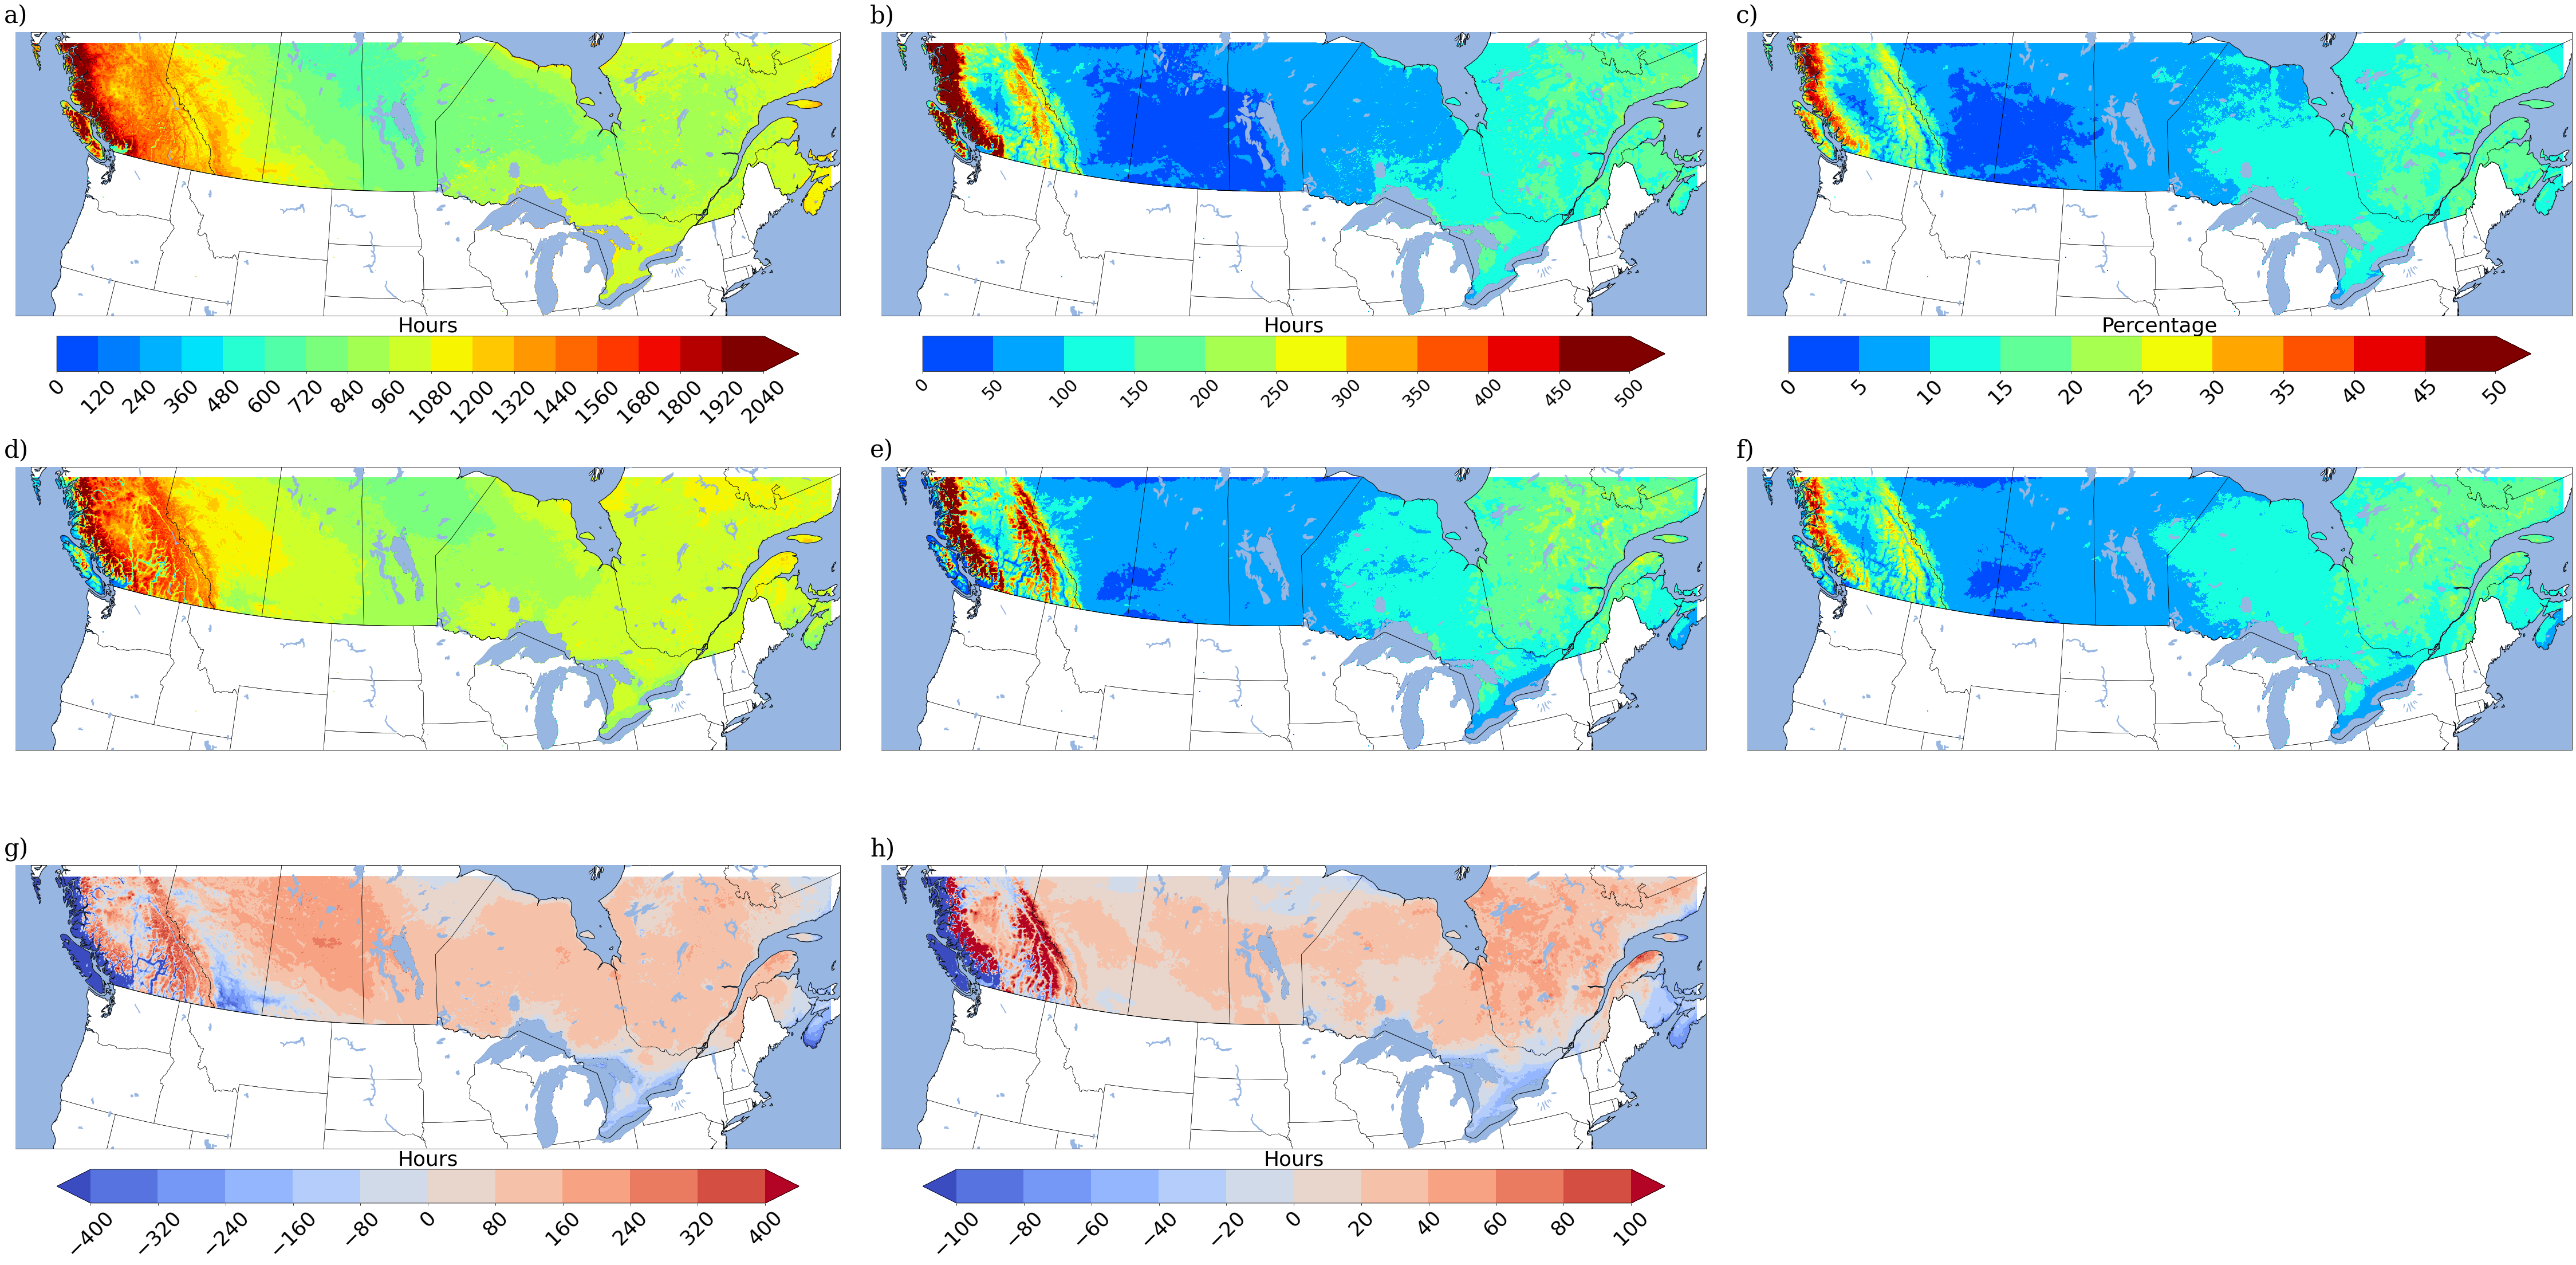

In [23]:
# Put all the figures in a single figure
import matplotlib.transforms as mtransforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

f, axs = plt.subplots(3, 3, figsize=(80, 40), subplot_kw={'projection': myLambert}, constrained_layout=True)

orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.2, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)

width=1

f.subplots_adjust(wspace=0.05, hspace=0.01)
for i, ax in enumerate(axs.flat):
    
    #ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])
    ax.set_extent([xll-3.5, xur-9, 38.6, yur+2])
    
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, f.dpi_scale_trans)
    
    if i == 8:
        f.delaxes(ax)
        continue
    # Plot figure
    if i == 0:
        # CTRL: All Hours
        
        ax.text(0.0, 1.0, 'a)', transform=ax.transAxes + trans,
                            fontsize='42', va='bottom', fontfamily='serif')
        
        val_min = 0
        val_max = 2040
        val_int = 120
        ints = ( (val_max-val_min+val_int) / val_int)
        color_bnds  = np.linspace(val_min, val_max, int(ints))
        color_ticks = np.linspace(val_min, val_max, int(ints))
        norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
        
        unit = 'Hours'
        
        aux_poss = aux1['total_hour'].values.copy()
        aux_poss[usmask.mask_array.values == 1] = np.nan
        aux1['total_hour'] = (('south_north', 'west_east'), aux_poss)
        
        cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_hour'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)
        cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")
        cb.ax.set_title(unit, fontsize=36)
        cb.ax.tick_params(labelsize=36, labelrotation=45) 
        
        title = r"Yearly average number of Hours near 0${\rm ^\circ C}$"        
        #ax.set_title(title, fontsize=36, wrap=True)
    elif i==1:
        # CTRL: Hours with precip
        
        val_min = 0
        val_max = 500
        val_int = 50
        ints = ( (val_max-val_min+val_int) / val_int)
        color_bnds  = np.linspace(val_min, val_max, int(ints))
        color_ticks = np.linspace(val_min, val_max, int(ints))
        norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
        
        ax.text(0.0, 1.0, 'b)', transform=ax.transAxes + trans,
                            fontsize='42', va='bottom', fontfamily='serif')
        
        unit = 'Hours'
        
        aux_poss = aux1['total_hour_pr'].values.copy()
        aux_poss[usmask.mask_array.values == 1] = np.nan
        aux1['total_hour_pr'] = (('south_north', 'west_east'), aux_poss)
        
        cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_hour_pr'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)
    
        cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
        cb.ax.set_title(unit, fontsize=36)
        cb.ax.tick_params(labelsize=30, labelrotation=45) 
        
        title = r"Yearly average number of Hours near 0${\rm ^\circ C}$ with precipitation > 0.2 mm"
        #ax.set_title(title, fontsize=36, wrap=True)
        
    elif i==2:
        
        # CTRL: Percentage
        
        val_min = 0
        val_max = 50
        val_int = 5
        ints = ( (val_max-val_min+val_int) / val_int)
        color_bnds  = np.linspace(val_min, val_max, int(ints))
        color_ticks = np.linspace(val_min, val_max, int(ints))
        norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
        unit = 'Percentage'
        
        ax.text(0.0, 1.0, 'c)', transform=ax.transAxes + trans,
                            fontsize='42', va='bottom', fontfamily='serif')
        
        aux_poss = aux1['total_hour_perc'].values.copy()
        aux_poss[usmask.mask_array.values == 1] = np.nan
        aux1['total_hour_perc'] = (('south_north', 'west_east'), aux_poss)
        
        cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_hour_perc'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)        
        cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")        
        cb.ax.set_title(unit, fontsize=36)
        cb.ax.tick_params(labelsize=36, labelrotation=45)
        title = r"Percentage of near 0${\rm ^\circ C}$ occurrence with precipitation /nwith respect to all near 0${\rm ^\circ C}$ occurrences"
        
        #ax.set_title(title, fontsize=36, wrap=True)
        
        ax.add_feature(cfeature.OCEAN, zorder=10)
        
    elif i==3:
        
        # PGW: All Hours
        val_min = 0
        val_max = 2040
        val_int = 120
        ints = ( (val_max-val_min+val_int) / val_int)
        color_bnds  = np.linspace(val_min, val_max, int(ints))
        color_ticks = np.linspace(val_min, val_max, int(ints))
        norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
        
        unit = 'Hours'
        
        ax.text(0.0, 1.0, 'd)', transform=ax.transAxes + trans,
                            fontsize='42', va='bottom', fontfamily='serif')
        
        
        aux_poss = aux1['total_hour_pgw'].values.copy()
        aux_poss[usmask.mask_array.values == 1] = np.nan
        aux1['total_hour_pgw'] = (('south_north', 'west_east'), aux_poss)
        
        cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_hour_pgw'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)        
        
    elif i == 4:
        
        # PGW: hours with precipitation
        val_min = 0
        val_max = 500
        val_int = 50
        ints = ( (val_max-val_min+val_int) / val_int)
        color_bnds  = np.linspace(val_min, val_max, int(ints))
        color_ticks = np.linspace(val_min, val_max, int(ints))
        norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
        
        unit = 'Hours'
        
        ax.text(0.0, 1.0, 'e)', transform=ax.transAxes + trans,
                            fontsize='42', va='bottom', fontfamily='serif')
        
        aux_poss = aux1['total_hour_pr_pgw'].values.copy()
        aux_poss[usmask.mask_array.values == 1] = np.nan
        aux1['total_hour_pr_pgw'] = (('south_north', 'west_east'), aux_poss)
        
        cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_hour_pr_pgw'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)
    elif i == 5:
        
        # PGW: Percentage
        
        val_min = 0
        val_max = 50
        val_int = 5
        ints = ( (val_max-val_min+val_int) / val_int)
        color_bnds  = np.linspace(val_min, val_max, int(ints))
        color_ticks = np.linspace(val_min, val_max, int(ints))
        norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
        
        ax.text(0.0, 1.0, 'f)', transform=ax.transAxes + trans,
                            fontsize='42', va='bottom', fontfamily='serif')
        
        aux_poss = aux1['total_hour_pgw_perc'].values.copy()
        aux_poss[usmask.mask_array.values == 1] = np.nan
        aux1['total_hour_pgw_perc'] = (('south_north', 'west_east'), aux_poss)
        
        cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_hour_pgw_perc'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)         
                        
        ax.add_feature(cfeature.OCEAN, zorder=10)
        
    elif i == 6:
        
        # Difference, all hours
        val_max = 400
        val_min = -400
        val_int = 80
        new_cmap = plt.cm.coolwarm
        unit = "Hours"
        title = r"Diff. of the yearly average number of hours near 0 C"        

        ints = ( (val_max-val_min+val_int) / val_int)
        color_bnds  = np.linspace(val_min, val_max, int(ints))
        color_ticks = np.linspace(val_min, val_max, int(ints))
        norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
        # Plot figure                
        
        ax.text(0.0, 1.0, 'g)', transform=ax.transAxes + trans,
                            fontsize='42', va='bottom', fontfamily='serif')
        
        cs = (aux1['total_hour_pgw'] - aux1['total_hour']).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
                   add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=val_min, vmax=val_max)
        #cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
        #cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
        # Plot colorbar
        cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="both")        
        cb.ax.set_title(unit, fontsize=36)
        cb.ax.tick_params(labelsize=36, labelrotation=45) 
        #ax.set_title(title, fontsize=38, wrap=True)               
    elif i == 7:
        a = 0
        # Difference, hours with precipitation
        val_max = 100
        val_min = -100
        val_int = 20
        new_cmap = plt.cm.coolwarm
        unit = "Hours"
        title = r"Diff. of the yearly average number of Hours near 0${\rm ^\circ C}$ with precip. > 0.2 mm"        

        ax.text(0.0, 1.0, 'h)', transform=ax.transAxes + trans,
                            fontsize='42', va='bottom', fontfamily='serif')
        
        ints = ( (val_max-val_min+val_int) / val_int)
        color_bnds  = np.linspace(val_min, val_max, int(ints))
        color_ticks = np.linspace(val_min, val_max, int(ints))
        norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
        # Plot figure
        cs = (aux1['total_hour_pr_pgw'] - aux1['total_hour_pr']).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
                   add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=val_min, vmax=val_max)
        #cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
        #cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
        # Plot colorbar
        cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="both")        
        cb.ax.set_title(unit, fontsize=36)
        cb.ax.tick_params(labelsize=36, labelrotation=45) 
        
        #ax.set_title(title, fontsize=38, wrap=True)
    # Plot title
    #
    
    
    
        
    ax.coastlines(resolution='50m', linewidth=width, zorder=11)
    ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=11)
    ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
    ax.add_feature(cfeature.OCEAN, zorder=10)
    ax.add_feature(cfeature.LAKES, zorder=10)

    #ax.set_title(f"Month: {i+1:02d}", fontsize=20)

    #plt.tight_layout()        

#plt.show()
plt.savefig('near0_fig3_v2.png', facecolor='white', bbox_inches='tight')

In [27]:
# Plotting the station values over the model

df = pd.read_csv('stations_dist_v4.dat', sep=';')
llat = []
llon = []
lnear0 = []
lnear0rain = []
for row in df.iterrows():
    lat = float(row[1]['LAT'])
    lon = float(row[1]['LON'])
    near0 = float(row[1]['NEAR0'])
    near0rain = float(row[1]['NEAR0_P01'])
    llat.append(lat)
    llon.append(lon)
    lnear0.append(near0)    
    lnear0rain.append(near0rain)

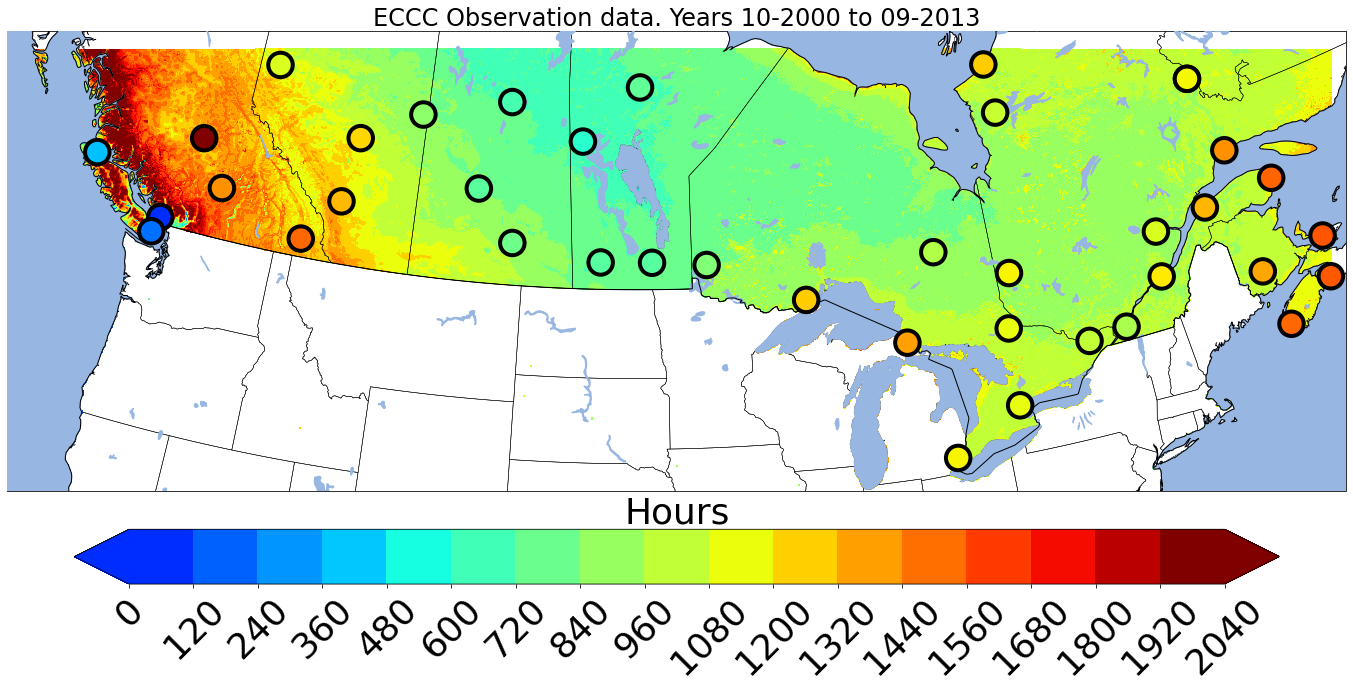

In [30]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(24, 14), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 2040 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 120
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "Hours"
title = r"ECCC Observation data. Years 10-2000 to 09-2013"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])
ax.set_extent([xll-3.5, xur-9, 38.6, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))

 

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
#norm = colors.BoundaryNorm(boundaries=color_bnds, ncolors=256)
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_hour'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

plt.scatter(x=llat, y=llon, c=lnear0, cmap=new_cmap, s=600, edgecolor='black', lw=4, transform=ccrs.PlateCarree(), zorder=12)
#norm = colors.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
#cs = aux1['total_hour'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
#           add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=0, vmax=val_max, extend='max')

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="both")        
cb.ax.set_title(unit, fontsize=36)
cb.ax.tick_params(labelsize=36, labelrotation=45)
        
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='50m', linewidth=width, zorder=11)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=11)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
ax.add_feature(cfeature.OCEAN, zorder=10)
ax.add_feature(cfeature.LAKES, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

#plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('eccc_stations_plus_model_v3.png', facecolor='white', bbox_inches='tight')
plt.show()

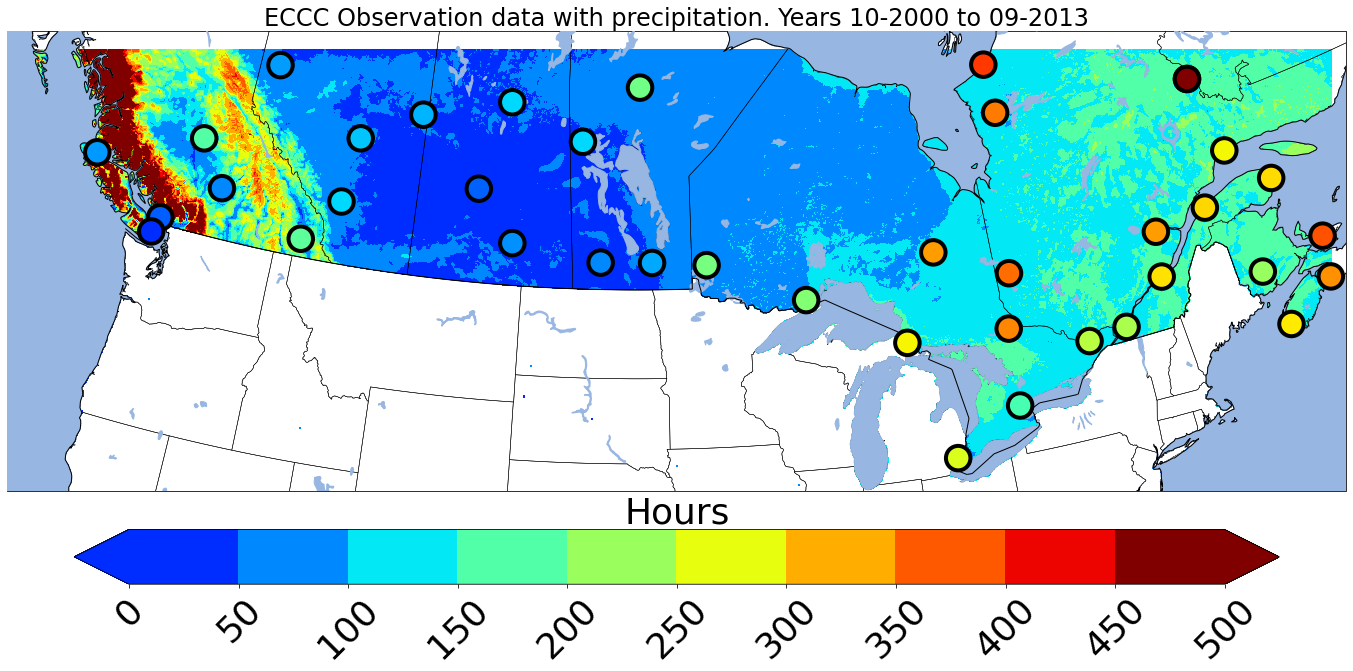

In [31]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(24, 14), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 500 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 50
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "Hours"
title = r"ECCC Observation data with precipitation. Years 10-2000 to 09-2013"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])
ax.set_extent([xll-3.5, xur-9, 38.6, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
#norm = colors.BoundaryNorm(boundaries=color_bnds, ncolors=256)
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_hour_pr'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)

plt.scatter(x=llat, y=llon, c=lnear0rain, cmap=new_cmap, s=600, edgecolor='black', lw=4, transform=ccrs.PlateCarree(), zorder=12)
#norm = colors.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
#cs = aux1['total_hour'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
#           add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=0, vmax=val_max, extend='max')

# Plot colorbar
cb = f.colorbar(cs, ax=ax, ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="both")        
cb.ax.set_title(unit, fontsize=36)
cb.ax.tick_params(labelsize=36, labelrotation=45)
# title
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='50m', linewidth=width, zorder=11)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width, zorder=11)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
ax.add_feature(cfeature.OCEAN, zorder=10)
ax.add_feature(cfeature.LAKES, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

#plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('eccc_stations_rain_plus_model_v3.png', facecolor='white', bbox_inches='tight')
plt.show()



In [12]:
np.nanmax(aux1['total_hour_perc'].values)

417.3173515981735

In [20]:
new_cmap.shape

(256, 4)

<ipython-input-55-ebe24070a122>:37: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="both")


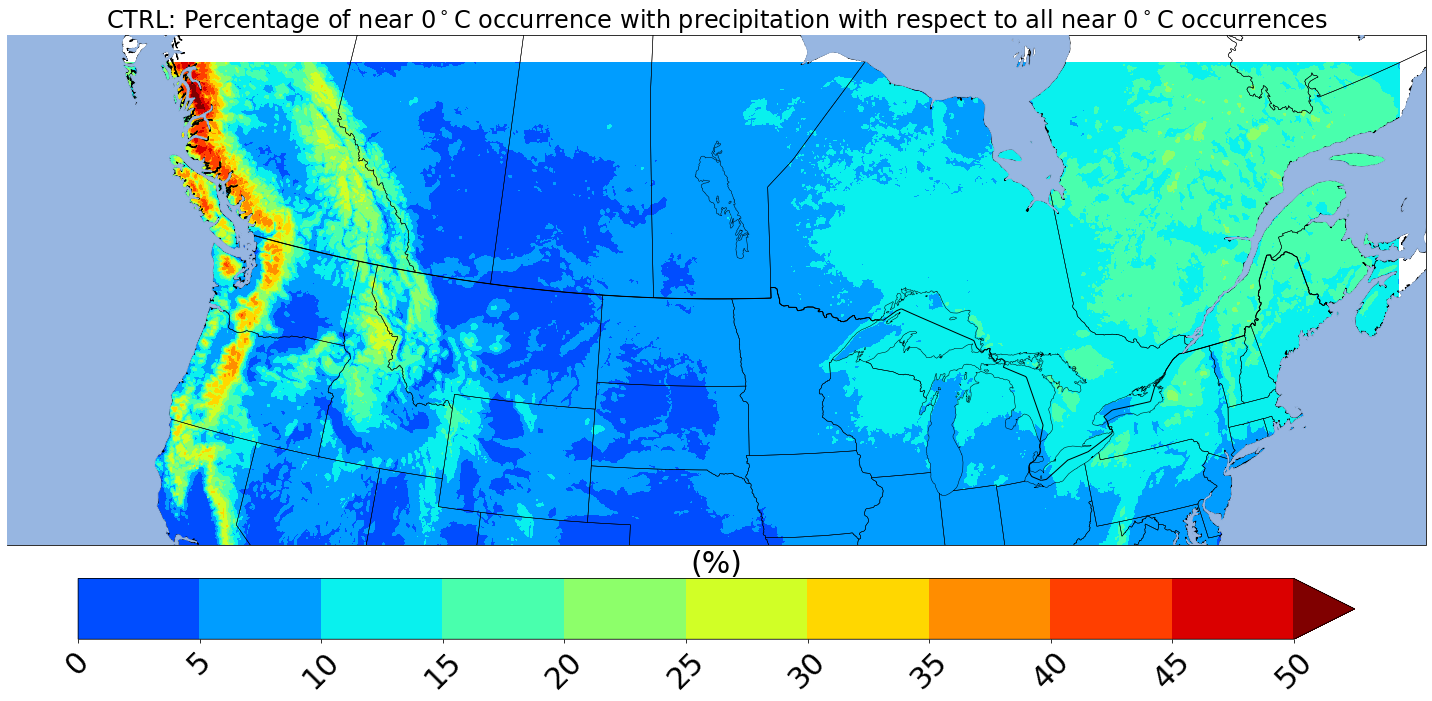

In [55]:
# Percentage of near 0 occurrence with precipitation with respect to all near 0 occurrences
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

width = 1.0  

#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 50 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 5

new_cmap = plt.cm.jet#(np.linspace(.3, 1, 256))
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.2, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "(%)"
title = r"CTRL: Percentage of near 0${\rm ^\circ C}$ occurrence with precipitation with respect to all near 0${\rm ^\circ C}$ occurrences"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
#norm = colors.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = aux1['total_hour_perc'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
           add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=val_min, vmax=val_max, extend='max')
#cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
#cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
# Plot colorbar
cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="both")
cb.ax.set_title(unit, fontsize=30)
cb.ax.tick_params(labelsize=30, labelrotation=45) 
# Plot title
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('CTRL_near0_perc_pr02.png')
#plt.show()

<ipython-input-56-db111397839d>:37: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="both")


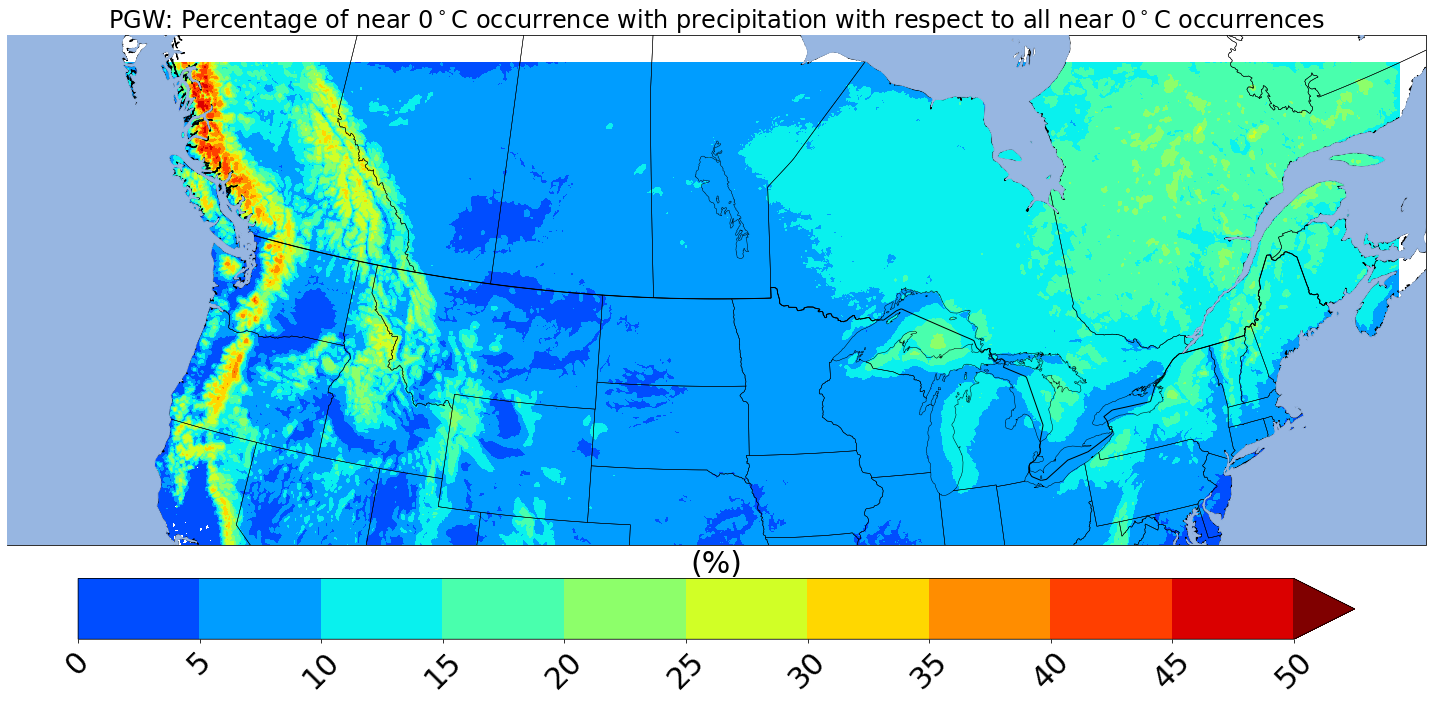

In [56]:
# Percentage of near 0 occurrence with precipitation with respect to all near 0 occurrences
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

width = 1.0  

#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 50 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 5

new_cmap = plt.cm.jet#(np.linspace(.3, 1, 256))
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.2, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "(%)"
title = r"PGW: Percentage of near 0${\rm ^\circ C}$ occurrence with precipitation with respect to all near 0${\rm ^\circ C}$ occurrences"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
#norm = colors.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = aux1['total_hour_pgw_perc'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
           add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=val_min, vmax=val_max, extend='max')
#cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
#cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
# Plot colorbar
cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="both")
cb.ax.set_title(unit, fontsize=30)
cb.ax.tick_params(labelsize=30, labelrotation=45) 
# Plot title
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('PGW_near0_perc_pr02.png')
#plt.show()

<ipython-input-42-31d1a6b890d1>:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


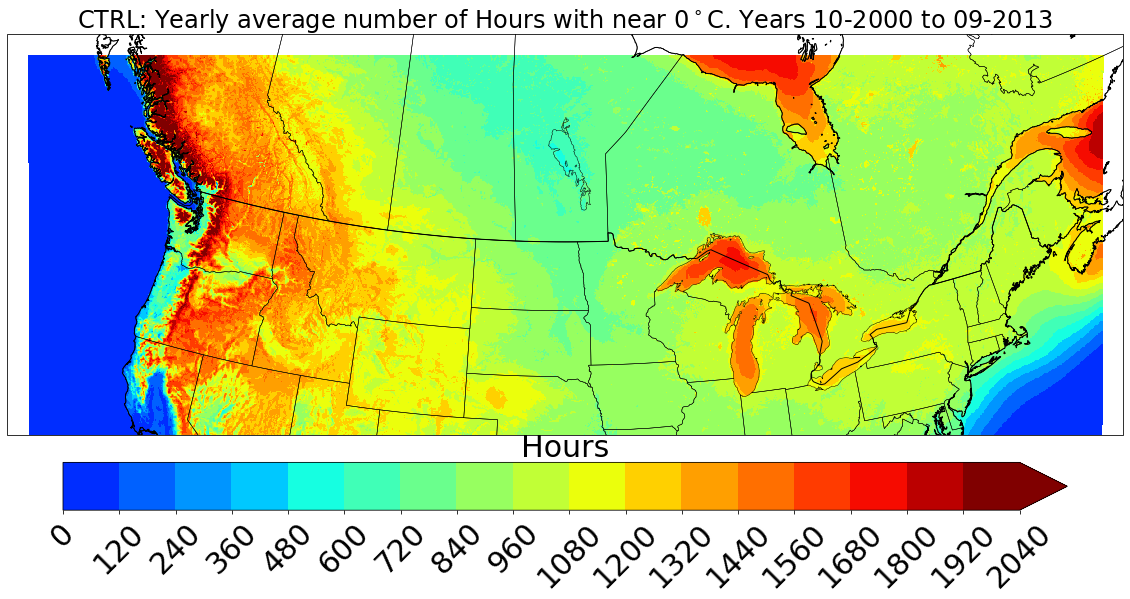

In [42]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 2040 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 120
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "Hours"
title = r"CTRL: Yearly average number of Hours with near 0${\rm ^\circ C}$. Years 10-2000 to 09-2013"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
#norm = colors.BoundaryNorm(boundaries=color_bnds, ncolors=256)
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_hour'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)
#cs = aux1['total_hour'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
#           add_colorbar=False, cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)
#cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
#cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
# Plot colorbar
cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")
cb.ax.set_title(unit, fontsize=30)
cb.ax.tick_params(labelsize=30, labelrotation=45) 
# Plot title
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near_zero_hours_jet.png')
plt.show()

In [20]:
color_bnds

array([   0.,  120.,  240.,  360.,  480.,  600.,  720.,  840.,  960.,
       1080., 1200., 1320., 1440., 1560., 1680., 1800., 1920., 2040.])

<ipython-input-38-2c27e8421d50>:47: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


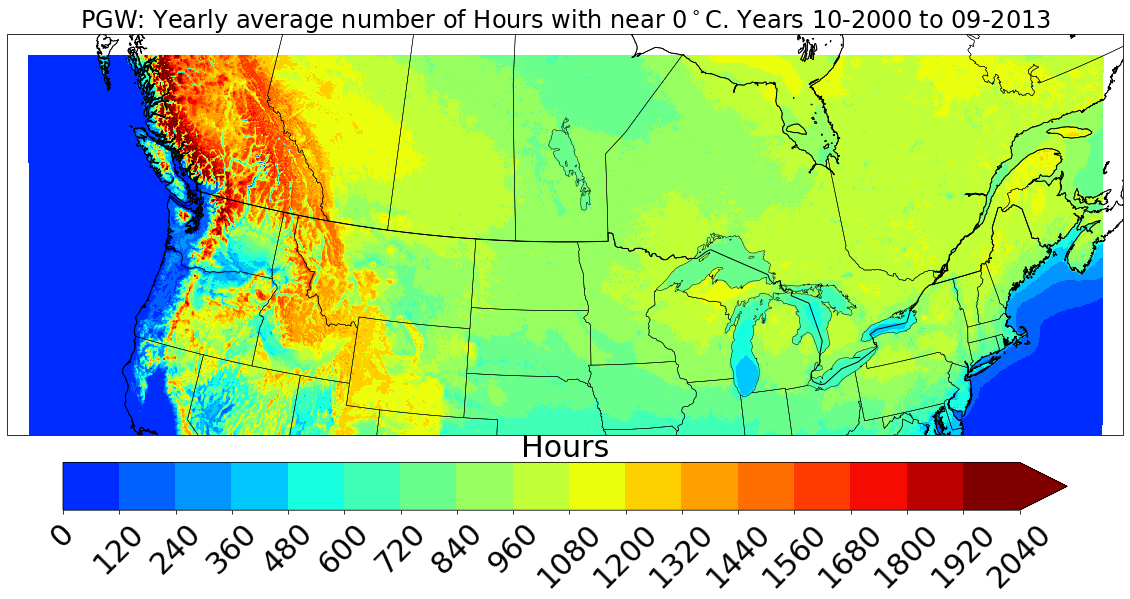

In [38]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

width = 1.0  

val_max = 2040 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 120
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "Hours"
title = r"PGW: Yearly average number of Hours with near 0${\rm ^\circ C}$. Years 10-2000 to 09-2013"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = ax.pcolormesh(aux1['XLONG'].values, aux1['XLAT'].values, aux1['total_hour_pgw'].values, transform=ccrs.PlateCarree(),
                cmap=new_cmap, vmin=val_min, vmax=val_max, norm=norm)
#cs = aux1['total_hour_pgw'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
#           add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=0, vmax=val_max, extend='max')
#cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
#cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
# Plot colorbar
cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="max")
cb.ax.set_title(unit, fontsize=30)
cb.ax.tick_params(labelsize=30, labelrotation=45) 
# Plot title
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

#plt.savefig('near_zero_hours_PGW.png')
plt.show()

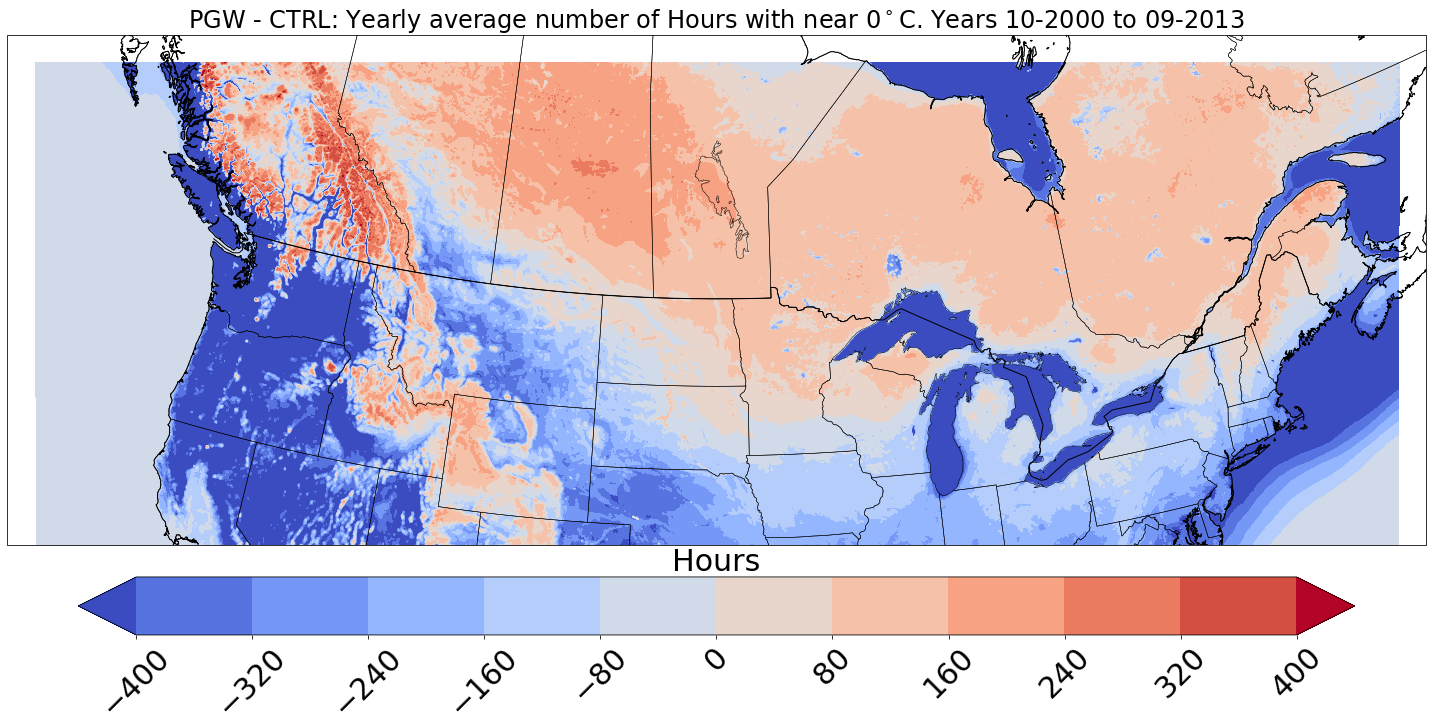

In [61]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

width = 1.0  

val_max = 400
val_min = -400
val_int = 80
new_cmap = plt.cm.coolwarm
unit = "Hours"
title = r"PGW - CTRL: Yearly average number of Hours with near 0${\rm ^\circ C}$. Years 10-2000 to 09-2013"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = (aux1['total_hour_pgw'] - aux1['total_hour']).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
           add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=val_min, vmax=val_max)
#cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
#cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
# Plot colorbar
cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9)
cb.ax.set_title(unit, fontsize=30)
cb.ax.tick_params(labelsize=30, labelrotation=45) 
# Plot title
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near_zero_hours_diff.png')
#plt.show()

<ipython-input-63-a0aebd774cce>:32: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="both")


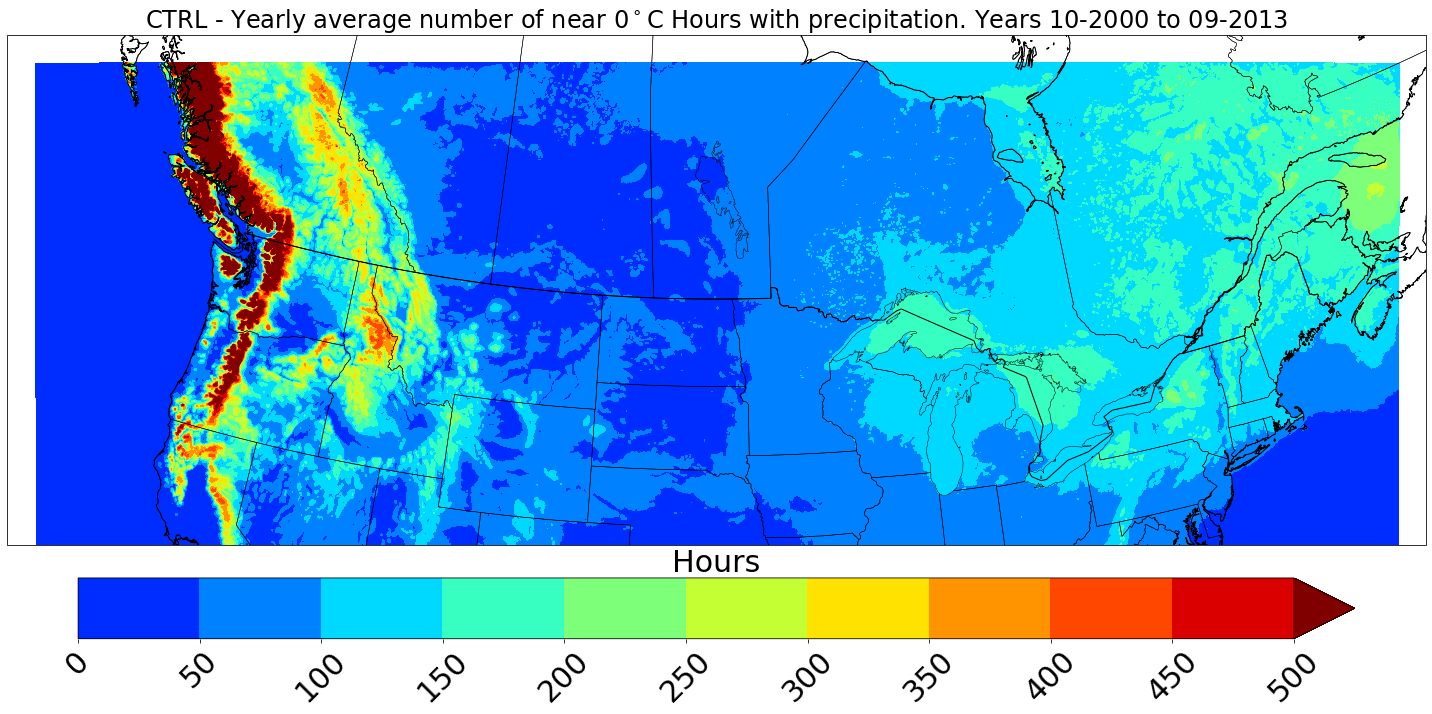

In [63]:
# Plotting Events - Annually
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

width = 1.0  

val_max = 500 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 50
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "Hours"
title = r"CTRL - Yearly average number of near 0${\rm ^\circ C}$ Hours with precipitation. Years 10-2000 to 09-2013"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = aux1['total_hour_pr'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
           add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=0, vmax=val_max, extend='max')
#cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
#cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
# Plot colorbar
cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="both")
cb.ax.set_title(unit, fontsize=30)
cb.ax.tick_params(labelsize=30, labelrotation=45) 
# Plot title
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig(f'hours_with_precip_02.png')
#plt.show()

<ipython-input-65-d953bdf79f9d>:32: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="both")


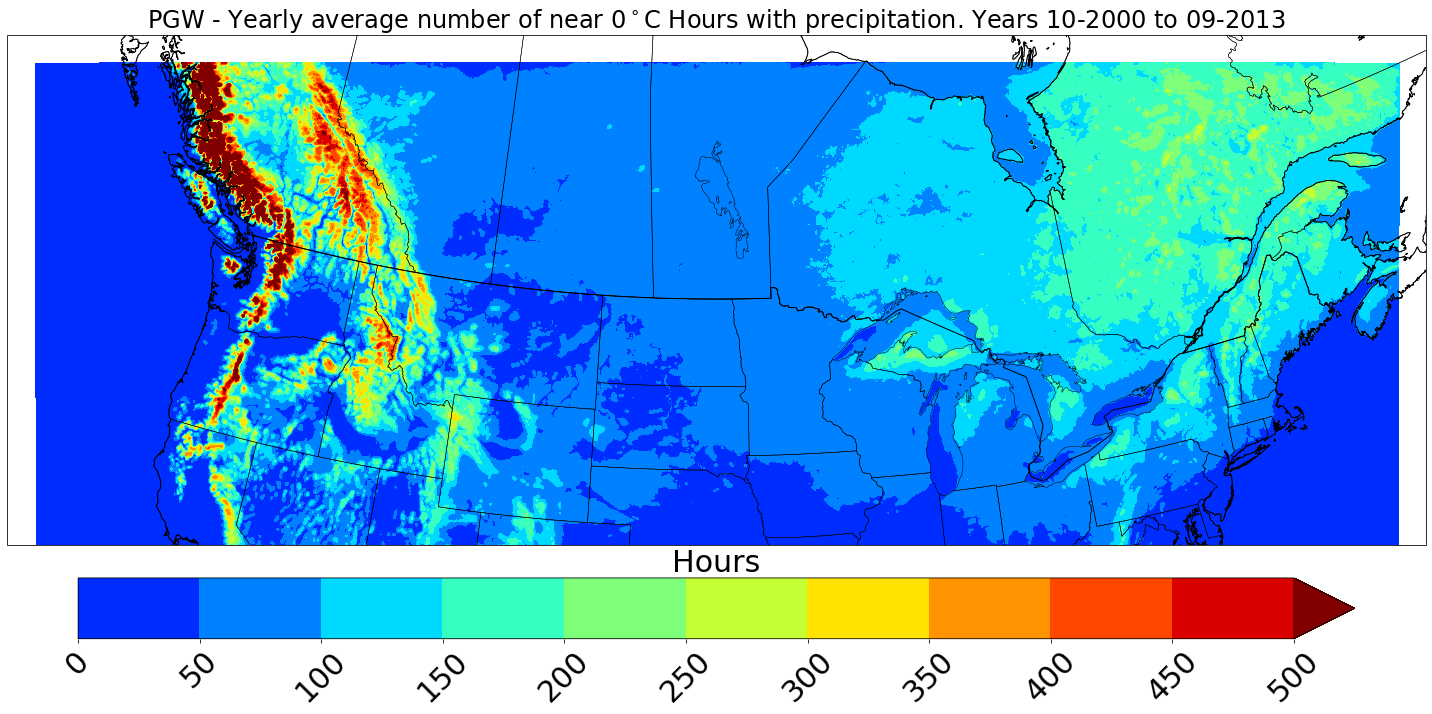

In [65]:
# Plotting Events - Annually
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

width = 1.0  

val_max = 500 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 50
orig_cmap = plt.cm.jet
colors = orig_cmap(np.linspace(0.17, 1, 256))
new_cmap = mpl.colors.LinearSegmentedColormap.from_list("jet", colors)
unit = "Hours"
title = r"PGW - Yearly average number of near 0${\rm ^\circ C}$ Hours with precipitation. Years 10-2000 to 09-2013"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = aux1['total_hour_pr_pgw'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
           add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=0, vmax=val_max, extend='max')
#cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
#cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
# Plot colorbar
cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="both")
cb.ax.set_title(unit, fontsize=30)
cb.ax.tick_params(labelsize=30, labelrotation=45) 
# Plot title
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig(f'hours_with_precip_02_PGW.png')
#plt.show()

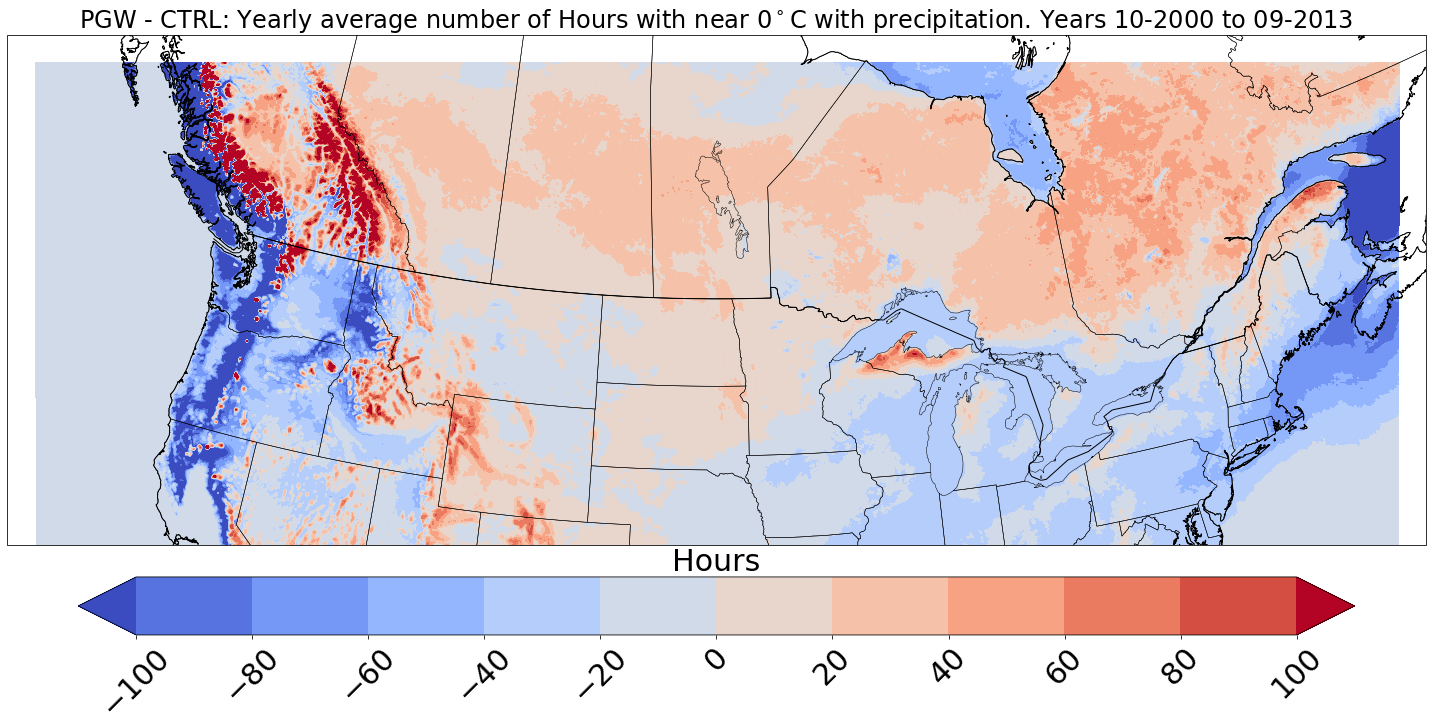

In [66]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

width = 1.0  

val_max = 100
val_min = -100
val_int = 20
new_cmap = plt.cm.coolwarm
unit = "Hours"
title = r"PGW - CTRL: Yearly average number of Hours with near 0${\rm ^\circ C}$ with precipitation. Years 10-2000 to 09-2013"

#ax.set_extent([xll, xur-10, 36, yur])
#ax.set_extent([xll-7.6, xur-8.5, 36, yur+2.4])
ax.set_extent([xll-6.6, xur-9.65, 36, yur+2])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = cls.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = (aux1['total_hour_pr_pgw'] - aux1['total_hour_pr']).plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
           add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=val_min, vmax=val_max)
#cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
#cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
# Plot colorbar
cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9)
cb.ax.set_title(unit, fontsize=30)
cb.ax.tick_params(labelsize=30, labelrotation=45) 
# Plot title
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near_zero_hours_diff_PR02.png')
#plt.show()